<a href="https://colab.research.google.com/github/jong9810/TensorFlow-2.0/blob/main/7_2_RNN_LSTM_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RNN - LSTM 개념, 구조, 동작원리

## SimpleRNN 단점 : 장기 의존성 문제
- 입력 데이터가 많아질수록 SimpleRNN 레이어, 즉 은닉층에서 보관하고 있는 과거의 정보가 마지막 레이어까지 충분히 전달되지 못하는 현상을 말함

- tanh 출력 값의 범위는 -1 ~ 1 즉 절댓값이 1보다 작은 값이므로 시간이 많이 흐를수록 출력 값 H는 계속해서 작아짐. 따라서 가장 처음에 출력된 H 값이 가장 마지막 레이어까지 충분히 전달되는 것은 불가능함.

## LSTM (Long-Short Term Memory) : SimpleRNN의 장기 의존성 문제를 해결하기 위한 아이디어
- LSTM 레이어는 시간 t에서의 출력 값 Ht 이외에 LSTM 레이어 사이에서 공유되는 셀 상태(cell state) Ct라는 변수가 추가적으로 공유됨.
- Ct : 시간 t에서의 LSTM의 셀 상태를 다음 레이어로 전달하여 기존의 상태를 보존하므로 장기 의존성 문제를 해결할 수 있음.
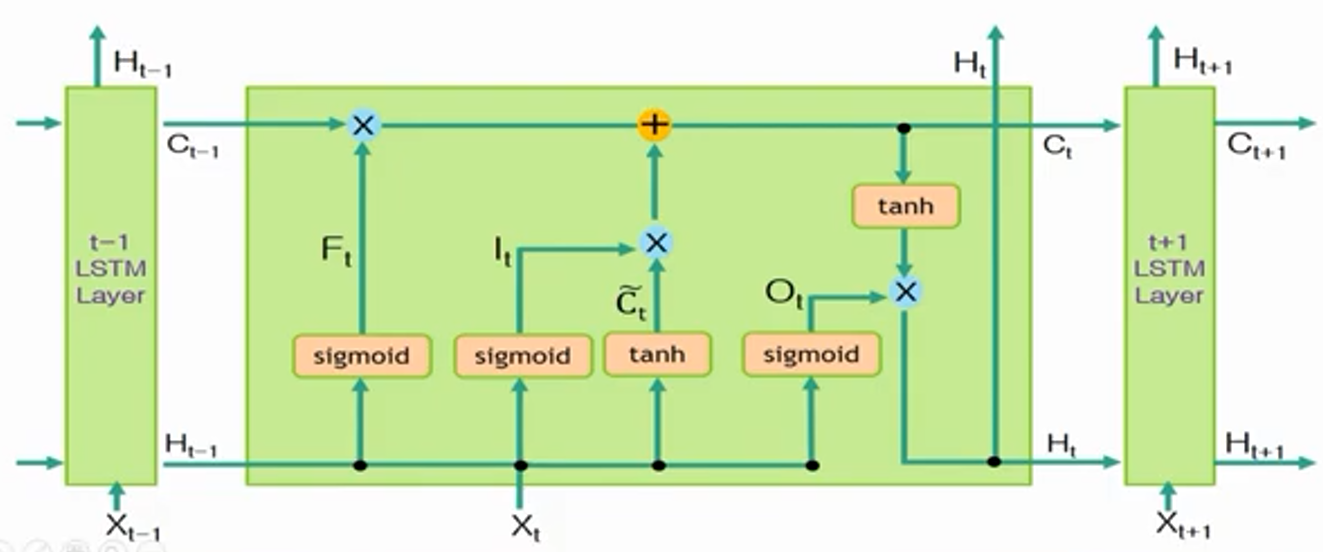

## LSTM의 구조 : 이전 단계의 정보를 memory cell에 저장하여 다음 단계로 전달
- 현재 시점의 정보를 바탕으로 과거 내용을 얼마나 잊을지 또는 기억할지 등을 계산하고, 그 결과에 현재 정보를 추가하여 다음 시점으로 정보를 전달함.

- 이러한 기능을 구현하기 위해 LSTM은 forget gate, input gate, output gate 등으로 구성되며 이러한 gate는 memory cell에 정보를 저장하고 다음 단계로 전달하는 역할을 수행함.

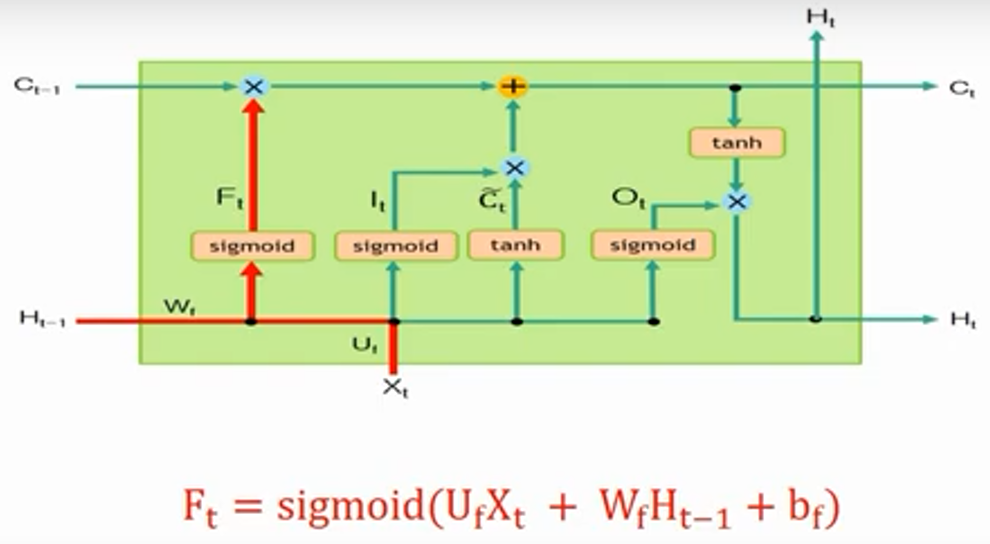

### LSTM 구조 - Forget Gate
- Xt, Uf : 현시점의 데이터, 가중치
- Ht-1, Wf : 과거의 은닉층 값, 가중치
- bf : forget gate에서 sigmoid를 활성화 함수로 가지는 노드에 적용되는 바이어스
- Ft : sigmoid 함수를 적용하여 과거의 정보를 얼마나 잊을지 결정

- 과거의 정보를 얼마나 잊을지(또는 기억할지) 결정하는 게이트
- 현시점의 데이터와 과거의 은닉층 출력 값에 각각의 가중치 (Wf, Uf)를 곱한 후 바이어스와 더해서 sigmoid 함수를 적용
- sigmoid 함수는 0 ~ 1 사이의 값을 가지므로, 계산값이 1에 가까우면 과거 정보를 많이 활용한다는 의미이고, 0에 가까우면 과거 정보를 많이 잃게 되는 원리임


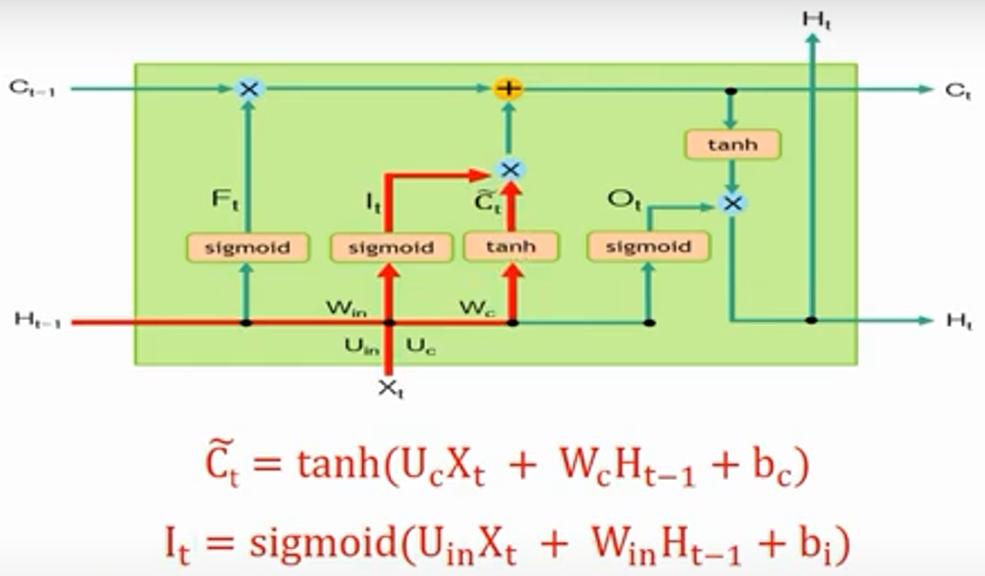

### LSTM 구조 - Input Gate
- Xt, Uin, Uc : 현재 시점의 입력 데이터, 가중치들
- Ht-1, Win, Wc : 과거의 은닉층 출력 값, 가중치들
- It : sigmoid 함수를 적용하여 어떤 정보를 업데이트할 지를 결정 (의미 : 현재 데이터의 중요도)
- C~t : tanh 함수를 적용하여 현재 시점의 새로운 정보를 생성
- bi : Input gate에서 sigmoid를 활성화 함수로 가지는 노드에 적용되는 바이어스
- bc : Input gate에서 tanh를 활성화 함수로 가지는 노드에 적용되는 바이어스

- 현재 시점에서 실제로 갖고 있는 정보가 얼마나 중요한지를 반영하여 cell에 기록함 (Input Gate 처리순서 : It & C~t 동시에)


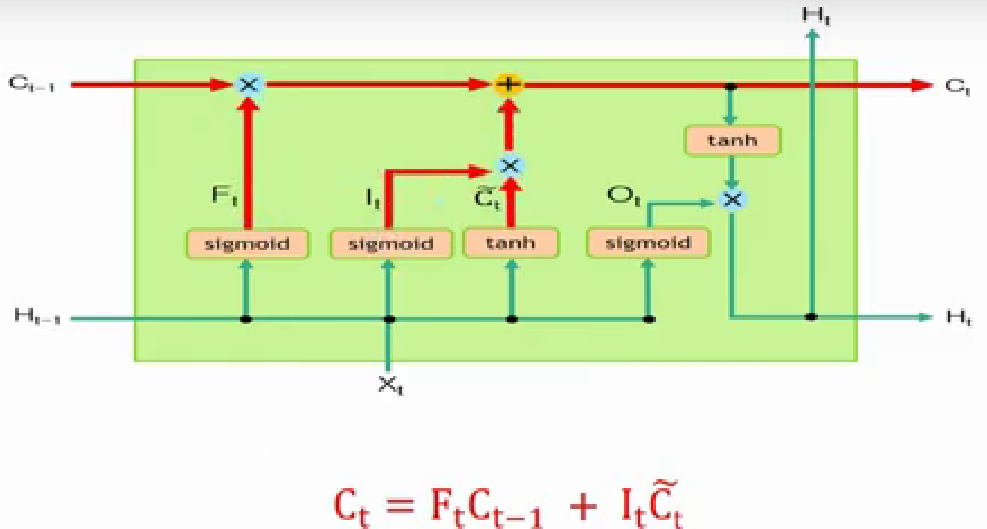

### LSTM 구조 - Cell State
- Ft : forget gate의 출력값
- It, C~t : input gate의 출력값들
- Ct-1 : 이전 time step에서 계산된 memory cell 값
- Ct : 현재 시점 기준의 memory cell 값

- cell state는 forget gate의 출력값과 input gate의 출력값을 이용하여 memory cell에 저장하는 단계임.
- 즉, 과거의 정보를 forget gate에서 계산된 만큼 잊고(또는 기억하고), 현 시점의 정보 값에 입력 게이트의 중요도만큼 곱해준 것을 더해서 현재 시점 기준의 memory cell 값을 계산함.

- 참고) 그림에서 x 표시는 모두 pointwise operation을 나타낸다.
- pointwise operation(점별 연산) : 차원이 같은 두 텐서의 각 원소마다 연산을 수행하는 것을 의미함.

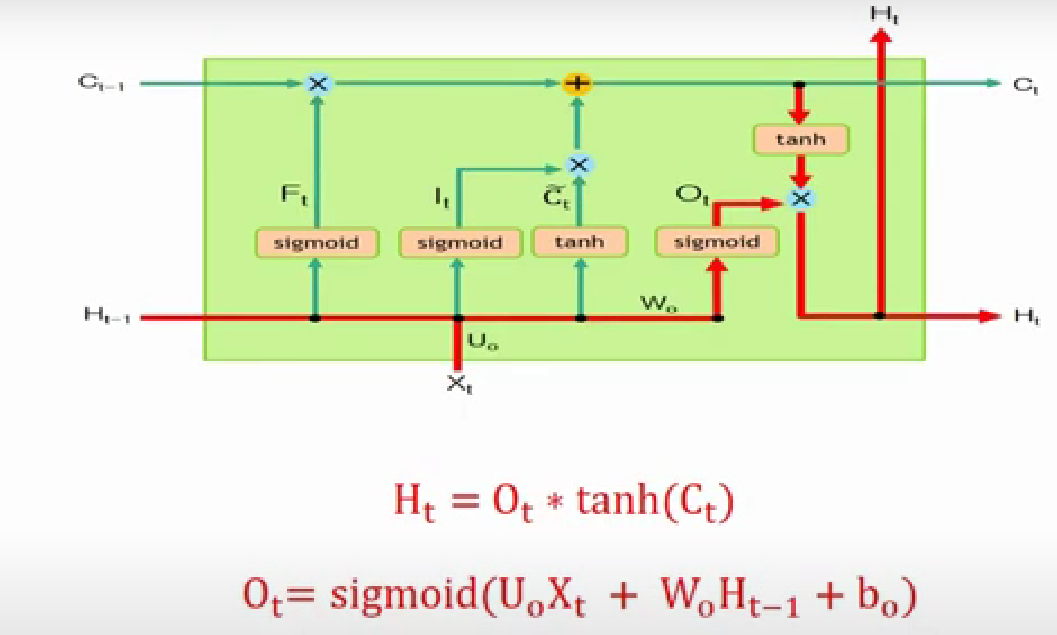

### LSTM 구조 - Output Gate
- Ht : 현재 시점의 LSTM(=은닉층) 출력값
- Ot : 과거 데이터와 현재 데이터 중 어느 부분을 더 많이 출력으로 내보낼지를 결정 (sigmoid 결과 : 0 ~ 1, 1에 가까울 수록 현재 데이터를 많이 포함)
- Ct : 현재 시점의 memory cell 값 (현재 시점 입력 데이터의 중요도)
- Xt, Uo : 현재 시점의 입력 데이터와 가중치
- Ht-1, Wo : 과거 시점의 LSTM 출력값과 가중치
- bo : Ouput gate에서 sigmoid를 활성화 함수로 가지는 노드의 바이어스 값

- output gate는 forget gate와 input gate에 의해서 변경된 현재 시점의 memory cell state 값을 얼마만큼 빼내서 다음 레이어로 전달할지를 결정하는 단계임.
- 이때 현재 시점의 LSTM 출력값 Ht = Ot * tanh(Ct) 수식에서의 '*'는 pointwise operation을 나타냄

## LSTM Summary
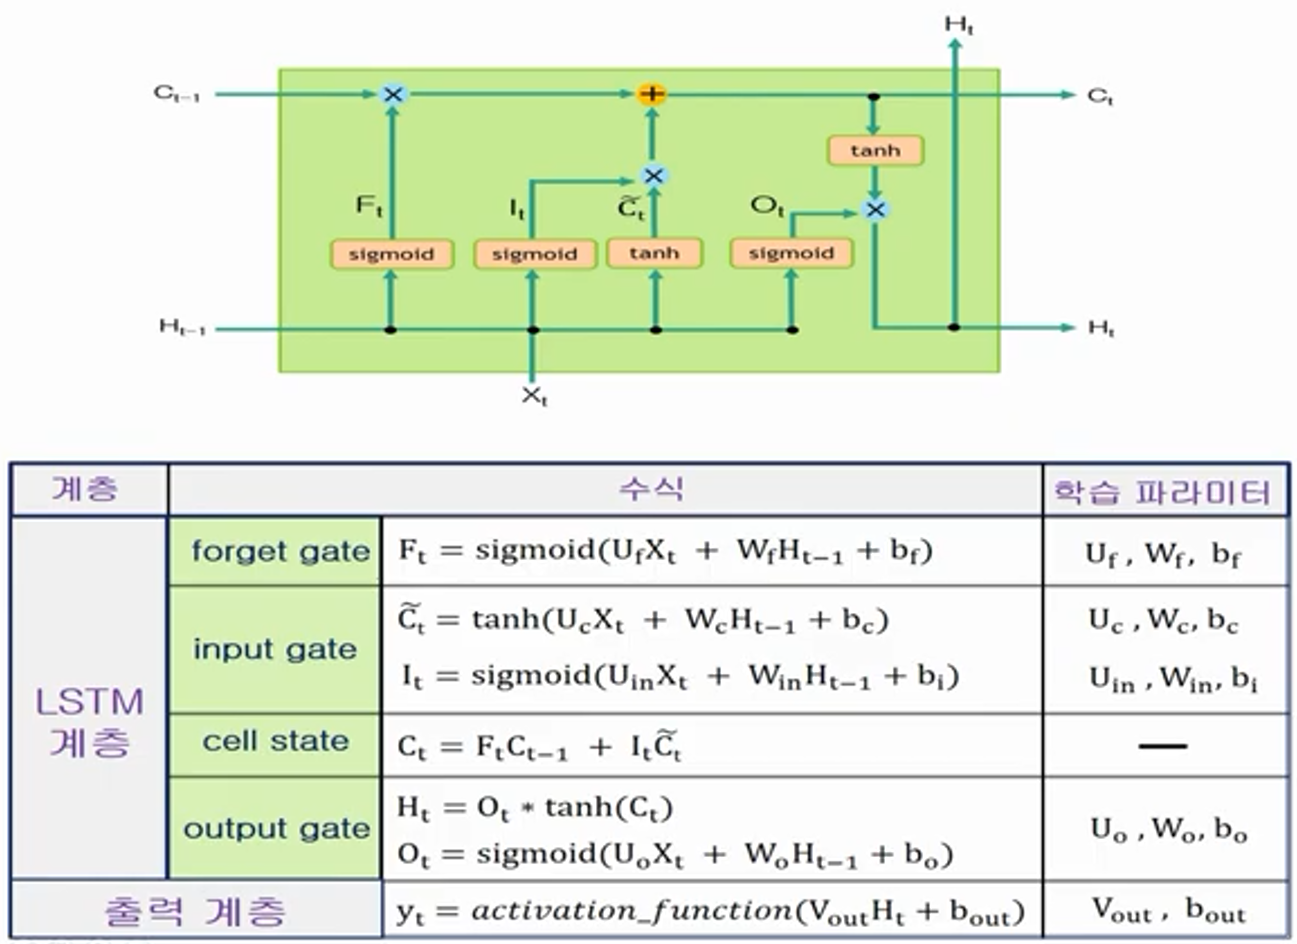

# LSTM Example : 삼성전자 주가 예측

### 과정
1. 데이터 로드 및 분포 확인
- df = pd.read_csv(), df.describe(), df.hist(), plot() 등 사용

2. 데이터 전처리
- outlier / missing value 확인 후 대체(또는 삭제) 처리
- 데이터 정규화(Normalization) / 표준화(Standardization)
- 딥러닝 학습을 위한 feature column / label column 정의

3. 데이터 생성
- window size 설정 후 feature / label 시계열 데이터 생성
- 학습 데이터 생성, 이때, 입력 데이터는 (batch size, time steps, input dims) 형태의 3차원 텐서로 생성되어야 함

4. 순환신경망 모델 구축 및 학습

5. 모델 평가

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

tf.__version__

In [ ]:
# 구글 드라이브를 구글 코랩에 마운트 시킴
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
# 1. 데이터 로드 및 분포 확인
raw_df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/dataset/005930.KS_3MA_5MA.csv')
raw_df.head()

In [ ]:
plt.figure(figsize=(7,4))

plt.title('SAMSUNG ELECTRONIC STOCK PRICE')
plt.ylabel('price (won)')
plt.xlabel('period (day)')
plt.grid()

plt.plot(raw_df['Adj Close'], label='Adj Close', color='blue')
plt.legend(loc='best')

plt.show()

In [ ]:
# 2-1. 데이터 전처리 - Outlier 확인
# Outlier : 통계적으로 비정상적으로 크거나 작은 데이터
# -> 딥러닝 학습을 위해서는 outlier를 적절한 값으로 바꾸거나 삭제하는 등의 처리가 반드시 필요함

# 판다스 .describe()함수를 통해 삼성전자 주가 데이터 통계를 확인해보면, 거래량을 나타내는 Volume 최소값이 0인 것을 알 수 있음.
# => 주식과 같은 금융 데이터에서 Volume(거래량) 값이 없는, 즉 0으로 나타나는 곳은 missing value(결측값)인 NaN으로 취급하는 것이 일반적임.
raw_df.describe()

In [ ]:
# 2-2. 데이터 전처리 : missing value(결측치) 확인
# missing value : 특정 데이터가 누락된 것을 말함 -> 제거하거나 적절한 값으로 대체하는 과정 필요

# 판다스의 isnull().sum() 함수를 통해서 삼성전자 주가 데이터의 missing value를 확인해보면, 
# 2개의 열(3MA, 5MAA)에서 각각 2개, 4개의 결측치가 있는 것을 확인할 수 있음.
# => 주식과 같은 금융 데이터에서 NaN으로 표시되는 결측치는 평균값이나 중간값으로 대체하지 않고 해당되는 행 전체를 삭제하는 것이 일반적임.
raw_df.isnull().sum()

In [ ]:
# Open 열의 값이 NaN인 행에 대해 모든 데이터 출력
raw_df.loc[raw_df['Open'].isna()]

In [ ]:
# Volume 값이 0을 NaN으로 모두 대체(replace)
raw_df['Volume'] = raw_df['Volume'].replace(0, np.nan)

# 각 column에 0 개수 확인
for col in raw_df.columns:
    missing_rows = raw_df.loc[raw_df[col]==0].shape[0]
    print(col + ': ' + str(missing_rows))

In [ ]:
raw_df.isnull().sum()

In [ ]:
raw_df = raw_df.dropna() # NaN 값이 있는 행 삭제
raw_df.isnull().sum()

In [ ]:
# 2-3. 데이터 전처리 : 정규화(Normalization)
# 딥러닝 학습이 원활하게 이루어지게 하기 위해 데이터를 정규화하는 작업이 필요함. 
# 날짜를 제외한 모든 열의 데이터에 대해 0~1 사이의 값을 가지도록 정규화를 수행.

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scale_cols = ['Open', 'High', 'Low', 'Close', 'Adj Close', '3MA', '5MA', 'Volume'] # 정규화 대상 column 정의
scaled_df = scaler.fit_transform(raw_df[scale_cols]) # 정규화 수행
# print(type(scaled_df), '\n') # 반환된 값은 numpy 배열이므로 pd.DataFrame()함수를 사용해서 변환해주어야 함. (pandas 형태로)

scaled_df = pd.DataFrame(scaled_df, columns=scale_cols) # 정규화된 새로운 DataFrame 생성
# print(scaled_df)

In [ ]:
# 2-4. 데이터 전처리 : feature column / label column 정의
feature_cols = ['3MA', '5MA', 'Adj Close'] # feature 정의 (입력 데이터)
label_cols = ['Adj Close'] # label 정의 (정답 데이터)

label_df = pd.DataFrame(scaled_df, columns=label_cols)
feature_df = pd.DataFrame(scaled_df, columns=feature_cols)

# print(feature_df)
# print(label_df)

# 딥러닝 학습을 위해 DataFrame -> numpy 변환
label_np = label_df.to_numpy()
feature_np = feature_df.to_numpy()

In [ ]:
# 3. 데이터 생성 : 입력 데이터 feature / 정답 데이터 label
# 시계열 데이터 형태로 변환해주는 함수
def make_sequence_dataset(feature, label, window_size):
    feature_list = [] # 생성될 feature list
    label_list = [] # 생성될 label list

    for i in range(len(feature) - window_size):
        feature_list.append(feature[i:i+window_size])
        label_list.append(label[i+window_size])
    
    return np.array(feature_list), np.array(label_list)

In [ ]:
window_size = 40 # horizontal factor 는 1로 지정함.

X, Y = make_sequence_dataset(feature_np, label_np, window_size)
# print(X.shape, Y.shape)

In [ ]:
# 4. 데이터 분리 및 모델 구축
split = -200
x_train = X[0:split]
y_train = Y[0:split]

# 테스트 데이터 개수 : 최근 데이터 200개
x_test = X[split:]
y_test = Y[split:]

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

In [ ]:
model = Sequential()

model.add(LSTM(128, activation='tanh', input_shape=x_train[0].shape)) # LSTM 계층에 활성화 함수로 tanh를 가지는 노드 수가 128개 존재
model.add(Dense(1, activation='linear'))

model.summary()

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

model.compile(loss='mse', optimizer='adam', metrics=['mae'])
early_stop = EarlyStopping(monitor='val_loss', patience=5) # 조기 종료 조건을 지정해줌

model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, batch_size=16, callbacks=[early_stop])

In [ ]:
# 5. 삼성전자 주가 예측
pred = model.predict(x_test)

plt.figure(figsize=(12,6))
plt.title('3MA + 5MA + Adj Close, window_size=40')
plt.xlabel('period')
plt.ylabel('adj close')
plt.grid()

plt.plot(y_test, label='actual')
plt.plot(pred, label='prediction')
plt.grid()
plt.legend(loc='best')

plt.show()

In [ ]:
# 더 해봐야할 것
# 1. 주가 예측 그래프가 정규화된 값으로 나타나므로 정규화 하기 전 그래프도 그려봐야 할 것
# 2. 